Import dataset from google drive into google colab

In [1]:
!cp -r "/content/drive/My Drive/lara/20-sec-CSV" "/content"

Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

Loading the dataset

In [3]:
# Define the root folder where your datasets are located
root_folder = "/content/20-sec-CSV"

# Define subfolder names
training_folder = "Training"
testing_folder = "Testing"

# Define file names
training_csv = "Training_20s.csv"
testing_csv = "Testing_20s.csv"

# Construct full paths to the CSV files
training_csv_path = os.path.join(root_folder, training_folder, training_csv)
testing_csv_path = os.path.join(root_folder, testing_folder, testing_csv)

# Load the datasets into Pandas DataFrames
training_data = pd.read_csv(training_csv_path)
testing_data = pd.read_csv(testing_csv_path)

# Combine the training and testing datasets
#data = pd.concat([training_data, testing_data], ignore_index=True)

# Training Dataset

### EDA

Class distribution of dataset

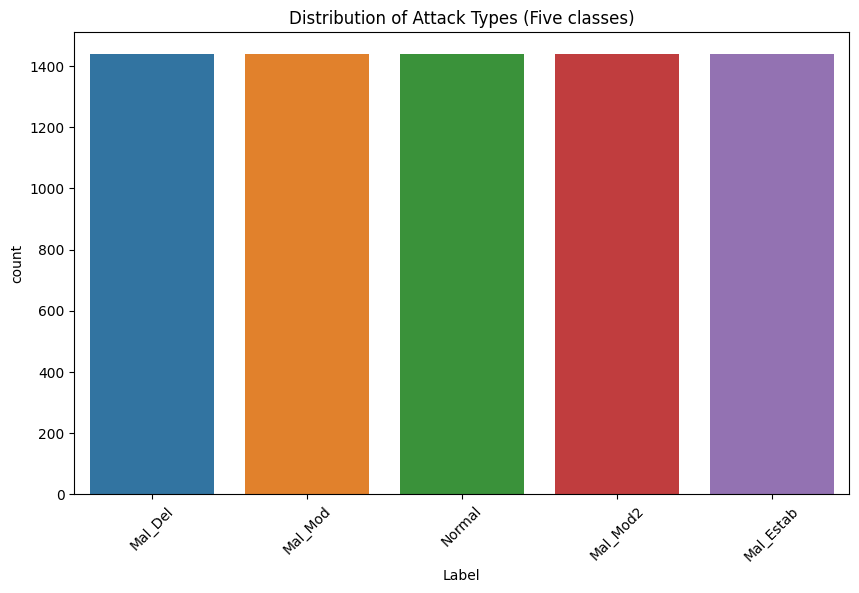

In [4]:
# Visualize the distribution of attack types
plt.figure(figsize=(10, 6))
sns.countplot(data=training_data, x='Label')
plt.title('Distribution of Attack Types (Five classes)')
plt.xticks(rotation=45)
plt.show()

In [5]:
# Define a function to map labels to two classes
def map_labels(label):
    if label == "Normal":
        return "Normal"
    else:
        return "Malicious"

# Apply the mapping function to the "Label" column and create a new column "Binary_Label"
training_data["Binary_Label"] = training_data["Label"].apply(map_labels)

# Drop the original "Label" column if you no longer need it
training_data = training_data.drop("Label", axis=1)

Class distribution of dataset

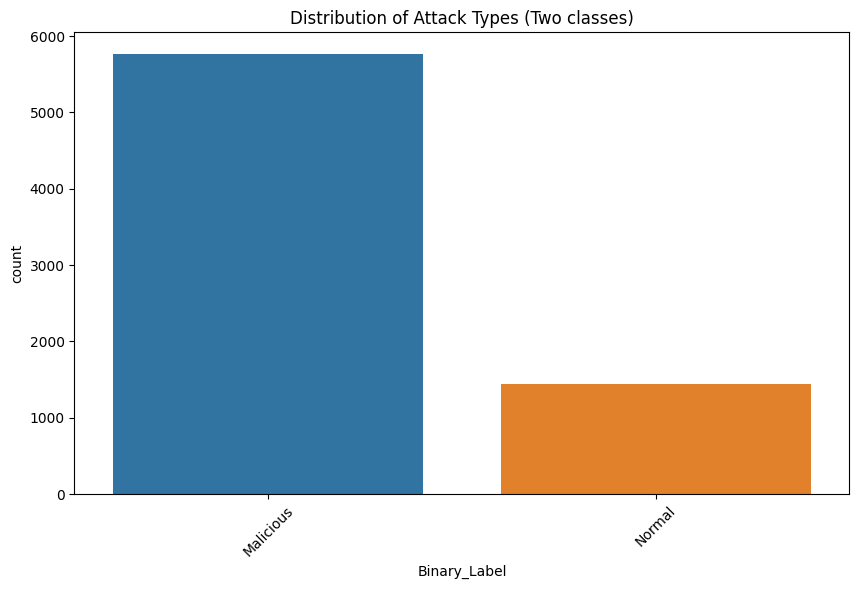

In [6]:
# Visualize the distribution of attack types
plt.figure(figsize=(10, 6))
sns.countplot(data=training_data, x='Binary_Label')
plt.title('Distribution of Attack Types (Two classes)')
plt.xticks(rotation=45)
plt.show()

Show sample of training dataset

In [7]:
training_data

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Binary_Label
0,3918,172.21.0.100-172.21.0.120-80-36254-6,172.21.0.120,36254,172.21.0.100,80,6,12/10/2022 11:48:46 PM,10004409,5,...,0,559.0,0.0,559.0,559.0,10003183.0,0.0,10003183.0,10003183.0,Malicious
1,5145,172.21.0.100-172.21.0.120-80-52918-6,172.21.0.120,52918,172.21.0.100,80,6,01/11/2022 04:59:37 PM,10004007,5,...,0,249.0,0.0,249.0,249.0,10002785.0,0.0,10002785.0,10002785.0,Malicious
2,4963,172.21.0.107-172.21.0.110-8805-8805-17,172.21.0.107,8805,172.21.0.110,8805,17,01/11/2022 04:38:44 PM,19987431,150,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,5608,172.21.0.100-172.21.0.120-80-52918-6,172.21.0.120,52918,172.21.0.100,80,6,22/11/2022 03:57:48 PM,10004084,5,...,0,241.0,0.0,241.0,241.0,10003521.0,0.0,10003521.0,10003521.0,Malicious
4,4417,172.21.0.110-172.21.0.120-8805-8805-17,172.21.0.110,8805,172.21.0.120,8805,17,13/10/2022 12:46:49 AM,11001199,3,...,0,374.0,0.0,374.0,374.0,11000288.0,0.0,11000288.0,11000288.0,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7194,4107,172.21.0.110-172.21.0.120-8805-8805-17,172.21.0.110,8805,172.21.0.120,8805,17,01/11/2022 03:00:28 PM,11001700,4,...,0,295.0,0.0,295.0,295.0,11001190.0,0.0,11001190.0,11001190.0,Malicious
7195,1256,172.21.0.100-172.21.0.107-80-43186-6,172.21.0.107,43186,172.21.0.100,80,6,22/11/2022 04:52:55 PM,10001141,5,...,0,859.0,0.0,859.0,859.0,10000032.0,0.0,10000032.0,10000032.0,Normal
7196,3676,172.21.0.110-172.21.0.120-8805-8805-17,172.21.0.110,8805,172.21.0.120,8805,17,01/11/2022 02:10:57 PM,11002338,3,...,0,211.0,0.0,211.0,211.0,11001853.0,0.0,11001853.0,11001853.0,Malicious
7197,5550,172.21.0.110-172.21.0.120-8805-8805-17,172.21.0.110,8805,172.21.0.120,8805,17,22/11/2022 03:51:06 PM,11001982,3,...,0,299.0,0.0,299.0,299.0,11001421.0,0.0,11001421.0,11001421.0,Malicious


### Preprocessing

Class encoding for training dataset

In [8]:
# Encode categorical variables using LabelEncoder
categorical_columns = ['Binary_Label']
label_encoders = {}  # Dictionary to store label encoders for each column

for col in categorical_columns:
    label_encoder = LabelEncoder()
    training_data[f'Encoded_{col}'] = label_encoder.fit_transform(training_data[col])
    label_encoders[col] = label_encoder
    training_data.drop([col], axis=1, inplace=True)  # Drop the original categorical column

Dropping irrelevant columns - training

In [9]:
# Drop columns that are irrelevant
columns_to_drop = ['Unnamed: 0', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Timestamp', 'FIN Flag Cnt',
                   'SYN Flag Cnt',	'RST Flag Cnt',	'PSH Flag Cnt',	'ACK Flag Cnt',	'URG Flag Cnt',	'CWE Flag Count',	'ECE Flag Cnt',
                   'Fwd Byts/b Avg',	'Fwd Pkts/b Avg',	'Fwd Blk Rate Avg',	'Bwd Byts/b Avg',	'Bwd Pkts/b Avg',	'Bwd Blk Rate Avg',
                   'Fwd Seg Size Min', 'Active Std', 'Idle Std']

training_data = training_data.drop(columns=columns_to_drop)

Scalling training dataset

In [10]:
drop_cols = ['Encoded_Binary_Label']
X_train = training_data.drop(drop_cols, axis=1)
y_train = training_data['Encoded_Binary_Label']

In [11]:
columns_to_scale = X_train.columns

In [12]:
# Standardization (Z-score Scaling)
#standard_scaler = StandardScaler()

# Standardization (Z-score Scaling)
standard_scaler = MinMaxScaler()

# Scale the selected columns
X_train[columns_to_scale] = standard_scaler.fit_transform(X_train[columns_to_scale])

In [13]:
X_train.sample(5)

,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Active Mean,Active Max,Active Min,Idle Mean,Idle Max,Idle Min
6785,0.352941,0.500193,0.010460,0.006504,0.022013,0.000071,0.071618,0.00,0.312672,0.142862,...,0.000071,0.0,0.982387,0.009967,0.000088,0.000088,0.000088,0.892146,0.892146,0.892146
4385,1.000000,0.997796,0.240586,0.000000,0.178433,0.000008,0.014147,0.16,0.110193,0.000000,...,0.000008,0.0,0.000000,0.382060,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6039,1.000000,0.995970,0.583682,0.452033,0.499806,0.021083,0.018568,0.16,0.127225,0.008527,...,0.021083,0.0,0.000000,0.926910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3655,0.352941,0.500100,0.010460,0.006504,0.022013,0.000071,0.071618,0.00,0.312672,0.142862,...,0.000071,0.0,0.982387,0.009967,0.000079,0.000079,0.000079,0.891993,0.891993,0.891993
486,1.000000,0.550080,0.006276,0.006504,0.004655,0.000042,0.014147,0.16,0.110193,0.000000,...,0.000042,0.0,0.000000,0.009967,0.000136,0.000136,0.000136,0.981091,0.981091,0.981091


### Feature Selection

#### 5 Features

Using ANOVA for 5 features

In [14]:
# Select top k features using ANOVA F-test
# Number of top features you want to select
k = 5
# For classification tasks
k_best = SelectKBest(score_func=f_classif, k=k)

X_train_ANOVA5 = k_best.fit_transform(X_train, y_train)

# Get the indices of the selected features
selected_feature_indices = k_best.get_support(indices=True)

# Get the names and scores of the selected features
selected_feature_names = X_train.columns[selected_feature_indices]
selected_feature_scores = k_best.scores_[selected_feature_indices]

# Rank the selected features by score in descending order
sorted_indices = (-selected_feature_scores).argsort()  # Sort in descending order
sorted_feature_names = selected_feature_names[sorted_indices]
sorted_feature_scores = selected_feature_scores[sorted_indices]

# Display the selected features and their scores ranked by score
print("Selected Features Ranked by ANOVA F-score:")
for feature_name, score in zip(sorted_feature_names, sorted_feature_scores):
    print(f"Feature: {feature_name}, F-score: {score}")


Selected Features Ranked by ANOVA F-score:
Feature: Fwd IAT Min, F-score: 2402.59793199475
Feature: Idle Max, F-score: 2114.380598257156
Feature: Idle Mean, F-score: 2113.9176364070963
Feature: Idle Min, F-score: 2113.063916836886
Feature: Flow IAT Std, F-score: 2004.0741719884707


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [30 32 33 51] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Using Chi Squared for five features

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Assuming you have already performed feature selection
k = 5  # Replace with the number of top features you selected
chi2_selector = SelectKBest(chi2, k=k)
X_train_chi5 = chi2_selector.fit_transform(X_train, y_train)

# Get the boolean mask of selected features
selected_features_mask = chi2_selector.get_support()

# Retrieve the original feature names
feature_names = list(X_train.columns)  # Assuming you're using a pandas DataFrame

# Get the selected feature names
selected_feature_names = [feature_names[i] for i, selected in enumerate(selected_features_mask) if selected]

# Print the selected feature names
print("Selected feature names:", selected_feature_names)

Selected feature names: ['Flow IAT Std', 'Fwd IAT Min', 'Idle Mean', 'Idle Max', 'Idle Min']


#### 10 Features

Using ANOVA for 10 features

In [16]:
# Select top k features using ANOVA F-test
# Number of top features you want to select
k = 10
# For classification tasks
k_best = SelectKBest(score_func=f_classif, k=k)

X_train_ANOVA10 = k_best.fit_transform(X_train, y_train)

# Get the indices of the selected features
selected_feature_indices = k_best.get_support(indices=True)

# Get the names and scores of the selected features
selected_feature_names = X_train.columns[selected_feature_indices]
selected_feature_scores = k_best.scores_[selected_feature_indices]

# Rank the selected features by score in descending order
sorted_indices = (-selected_feature_scores).argsort()  # Sort in descending order
sorted_feature_names = selected_feature_names[sorted_indices]
sorted_feature_scores = selected_feature_scores[sorted_indices]

# Display the selected features and their scores ranked by score
print("Selected Features Ranked by ANOVA F-score:")
for feature_name, score in zip(sorted_feature_names, sorted_feature_scores):
    print(f"Feature: {feature_name}, F-score: {score}")


Selected Features Ranked by ANOVA F-score:
Feature: Fwd IAT Min, F-score: 2402.59793199475
Feature: Idle Max, F-score: 2114.380598257156
Feature: Idle Mean, F-score: 2113.9176364070963
Feature: Idle Min, F-score: 2113.063916836886
Feature: Flow IAT Std, F-score: 2004.0741719884707
Feature: Flow IAT Max, F-score: 1973.0609450549605
Feature: Bwd IAT Std, F-score: 1800.0676889412819
Feature: Flow Duration, F-score: 1739.1007407135833
Feature: Fwd IAT Std, F-score: 1729.2539723674097
Feature: Fwd IAT Max, F-score: 1697.7022983912814


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [30 32 33 51] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Using Chi Squared for 10 features

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Assuming you have already performed feature selection
k = 10  # Replace with the number of top features you selected
chi2_selector = SelectKBest(chi2, k=k)
X_train_chi10 = chi2_selector.fit_transform(X_train, y_train)

# Get the boolean mask of selected features
selected_features_mask = chi2_selector.get_support()

# Retrieve the original feature names
feature_names = list(X_train.columns)  # Assuming you're using a pandas DataFrame

# Get the selected feature names
selected_feature_names = [feature_names[i] for i, selected in enumerate(selected_features_mask) if selected]

# Print the selected feature names
print("Selected feature names:", selected_feature_names)


Selected feature names: ['TotLen Fwd Pkts', 'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Subflow Fwd Byts', 'Idle Mean', 'Idle Max', 'Idle Min']


In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

k = 10  # Replace with the number of top features you selected
chi2_selector = SelectKBest(chi2, k=k)

# Fit the selector to your training data and transform it
X_train_chi10 = chi2_selector.fit_transform(X_train, y_train)

# Get the boolean mask of selected features
selected_features_mask = chi2_selector.get_support()

# Retrieve the original feature names (assuming you're using a pandas DataFrame)
feature_names = list(X_train.columns)

# Get the selected feature names by filtering the original feature names
selected_feature_names = [feature_names[i] for i, selected in enumerate(selected_features_mask) if selected]

# Get the scores of the selected features
feature_scores = chi2_selector.scores_

# Create a dictionary to store feature names and their scores
feature_scores_dict = {selected_feature_names[i]: feature_scores[i] for i in range(k)}

# Print the selected feature names and their scores
print("Selected feature names and scores:")
for feature_name, score in feature_scores_dict.items():
    print(f"{feature_name}: {score}")


Selected feature names and scores:
TotLen Fwd Pkts: 0.003435856922980151
Flow IAT Std: 95.81270565768268
Flow IAT Max: 21.03823249244394
Fwd IAT Std: 4.9204721136900575
Fwd IAT Max: 306.11210805026894
Fwd IAT Min: 3.8832204702393143
Subflow Fwd Byts: 1.4368274144924835
Idle Mean: 222.62426285359314
Idle Max: 53.517395126390014
Idle Min: 10.028937319034972


# Testing Dataset

### EDA

Class distribution of dataset

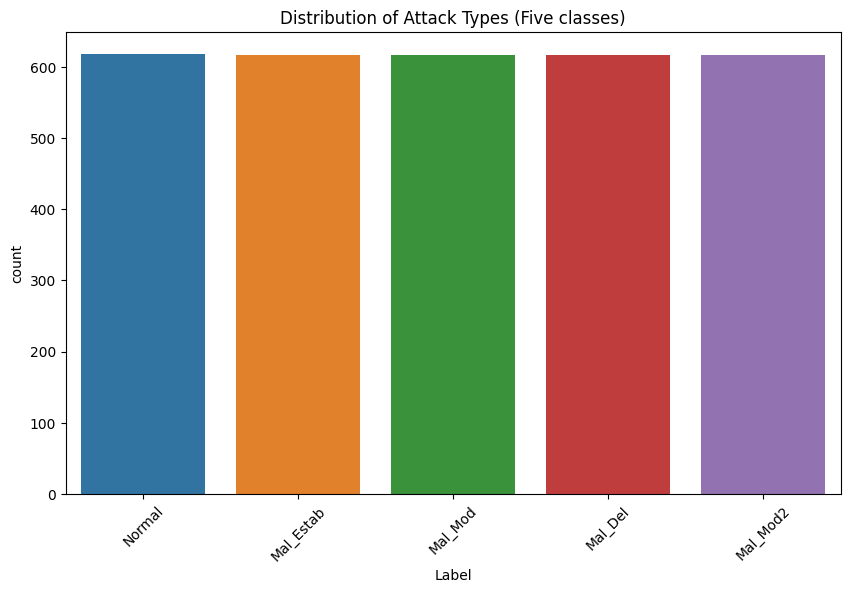

In [19]:
# Visualize the distribution of attack types
plt.figure(figsize=(10, 6))
sns.countplot(data=testing_data, x='Label')
plt.title('Distribution of Attack Types (Five classes)')
plt.xticks(rotation=45)
plt.show()

Class conversion

In [20]:
# Define a function to map labels to two classes
def map_labels(label):
    if label == "Normal":
        return "Normal"
    else:
        return "Malicious"

# Apply the mapping function to the "Label" column and create a new column "Binary_Label"
testing_data["Binary_Label"] = testing_data["Label"].apply(map_labels)

# Drop the original "Label" column if you no longer need it
testing_data = testing_data.drop("Label", axis=1)

Class distribution of dataset

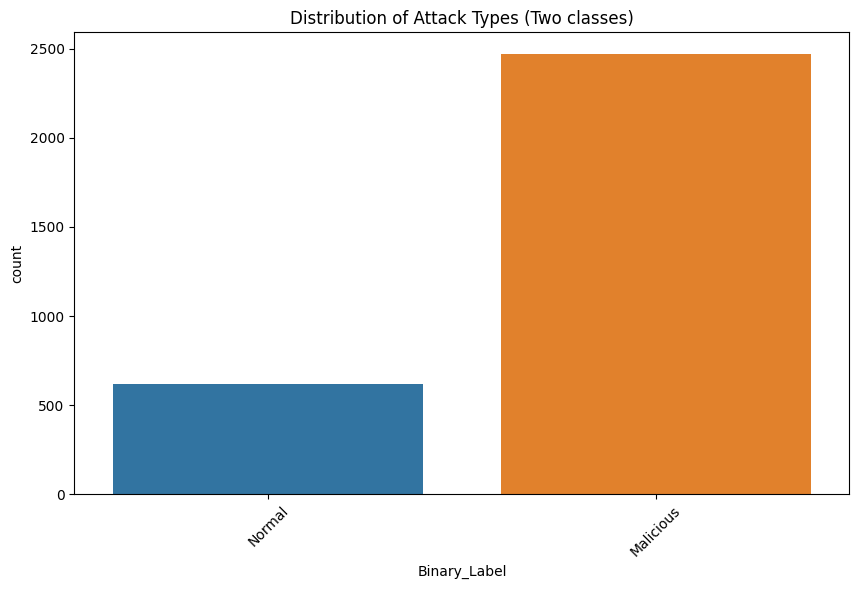

In [21]:
# Visualize the distribution of attack types
plt.figure(figsize=(10, 6))
sns.countplot(data=testing_data, x='Binary_Label')
plt.title('Distribution of Attack Types (Two classes)')
plt.xticks(rotation=45)
plt.show()

Show sample of training dataset

In [22]:
testing_data

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Binary_Label
0,3521,172.21.0.107-172.21.0.110-8805-8805-17,172.21.0.110,8805,172.21.0.107,8805,17,13/10/2022 03:21:06 AM,19836233,118,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,1861,172.21.0.110-172.21.0.120-8805-8805-17,172.21.0.110,8805,172.21.0.120,8805,17,04/10/2022 08:01:40 PM,19974778,262,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious
2,3778,172.21.0.110-172.21.0.120-8805-8805-17,172.21.0.110,8805,172.21.0.120,8805,17,01/11/2022 02:22:41 PM,11000674,3,...,0,214.0,0.0,214.0,214.0,11000320.0,0.0,11000320.0,11000320.0,Malicious
3,5954,172.21.0.100-172.21.0.120-80-36254-6,172.21.0.120,36254,172.21.0.100,80,6,13/10/2022 03:42:50 AM,10002632,5,...,0,665.0,0.0,665.0,665.0,10001397.0,0.0,10001397.0,10001397.0,Malicious
4,4869,172.21.0.100-172.21.0.120-80-52918-6,172.21.0.120,52918,172.21.0.100,80,6,01/11/2022 04:27:57 PM,10001839,5,...,0,564.0,0.0,564.0,564.0,10000989.0,0.0,10000989.0,10000989.0,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3081,2826,172.21.0.110-172.21.0.120-8805-8805-17,172.21.0.110,8805,172.21.0.120,8805,17,22/11/2022 03:21:57 PM,11000904,3,...,0,359.0,0.0,359.0,359.0,11000130.0,0.0,11000130.0,11000130.0,Malicious
3082,6071,172.21.0.110-172.21.0.120-8805-8805-17,172.21.0.110,8805,172.21.0.120,8805,17,22/11/2022 04:50:53 PM,11001546,3,...,0,520.0,0.0,520.0,520.0,11000805.0,0.0,11000805.0,11000805.0,Malicious
3083,4031,172.21.0.107-172.21.0.110-8805-8805-17,172.21.0.107,8805,172.21.0.110,8805,17,13/10/2022 12:02:36 AM,19983841,102,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3084,6225,172.21.0.110-172.21.0.120-8805-8805-17,172.21.0.110,8805,172.21.0.120,8805,17,22/11/2022 05:08:29 PM,11001774,3,...,0,115.0,0.0,115.0,115.0,11001534.0,0.0,11001534.0,11001534.0,Malicious


### Preprocessing

Class encoding for testing dataset

In [23]:
# Encode categorical variables using LabelEncoder
categorical_columns = ['Binary_Label']
label_encoders = {}  # Dictionary to store label encoders for each column

for col in categorical_columns:
    label_encoder = LabelEncoder()
    testing_data[f'Encoded_{col}'] = label_encoder.fit_transform(testing_data[col])
    label_encoders[col] = label_encoder
    testing_data.drop([col], axis=1, inplace=True)  # Drop the original categorical column

Dropping irrelevant columns - testing

In [24]:
# Drop columns that are irrelevant
columns_to_drop = ['Unnamed: 0', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Timestamp', 'FIN Flag Cnt',
                   'SYN Flag Cnt',	'RST Flag Cnt',	'PSH Flag Cnt',	'ACK Flag Cnt',	'URG Flag Cnt',	'CWE Flag Count',	'ECE Flag Cnt',
                   'Fwd Byts/b Avg',	'Fwd Pkts/b Avg',	'Fwd Blk Rate Avg',	'Bwd Byts/b Avg',	'Bwd Pkts/b Avg',	'Bwd Blk Rate Avg',
                   'Fwd Seg Size Min', 'Active Std', 'Idle Std']

testing_data = testing_data.drop(columns=columns_to_drop)

In [25]:
testing_data.shape

(3086, 61)

In [26]:
# Assuming 'df' is your DataFrame containing the dataset

# Step 1: Randomly select 200 records from the dataset
#num_records_to_select = 200
#sampled_df = testing_data.sample(n=num_records_to_select, random_state=42)  # You can adjust the random_state for reproducibility

# Step 2: Save the selected records to a new CSV file or any other format you prefer
#sampled_df.to_csv('sampled_dataset.csv', index=False)  # Change the filename and format as needed

In [27]:
#sampled_df.shape

Selecting 200 records from the testing dataset

In [28]:
# Assuming 'df' is your original DataFrame and 'sampled_df' contains the 200 records to remove

# Step 1: Identify the indices of the 200 records to remove
#indices_to_remove = sampled_df.index

# Step 2: Remove the identified indices from the original DataFrame
#testing_data = testing_data.drop(indices_to_remove)

# Step 3: Optionally, reset the index of the modified DataFrame
#testing_data = testing_data.reset_index(drop=True)

# Now, 'df' contains your original dataset with the 200 records removed

In [29]:
drop_cols = ['Encoded_Binary_Label']
X_test = testing_data.drop(drop_cols, axis=1)
y_test = testing_data['Encoded_Binary_Label']

In [30]:
X_test

,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Active Mean,Active Max,Active Min,Idle Mean,Idle Max,Idle Min
0,17,19836233,118,118,2458.0,1888.0,21.0,16.0,20.830508,0.908696,...,1888,-1,-1,118,0.0,0.0,0.0,0.0,0.0,0.0
1,17,19974778,262,263,4837.0,37748.0,21.0,16.0,18.461832,2.504493,...,37748,-1,-1,262,0.0,0.0,0.0,0.0,0.0,0.0
2,17,11000674,3,5,48.0,80.0,16.0,16.0,16.000000,0.000000,...,80,-1,-1,3,214.0,214.0,214.0,11000320.0,11000320.0,11000320.0
3,6,10002632,5,5,227.0,135.0,81.0,0.0,45.400000,41.955929,...,135,-1,501,3,665.0,665.0,665.0,10001397.0,10001397.0,10001397.0
4,6,10001839,5,5,227.0,135.0,81.0,0.0,45.400000,41.955929,...,135,-1,501,3,564.0,564.0,564.0,10000989.0,10000989.0,10000989.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3081,17,11000904,3,5,48.0,80.0,16.0,16.0,16.000000,0.000000,...,80,-1,-1,3,359.0,359.0,359.0,11000130.0,11000130.0,11000130.0
3082,17,11001546,3,5,48.0,80.0,16.0,16.0,16.000000,0.000000,...,80,-1,-1,3,520.0,520.0,520.0,11000805.0,11000805.0,11000805.0
3083,17,19983841,102,1,1632.0,16.0,16.0,16.0,16.000000,0.000000,...,16,-1,-1,102,0.0,0.0,0.0,0.0,0.0,0.0
3084,17,11001774,3,5,48.0,80.0,16.0,16.0,16.000000,0.000000,...,80,-1,-1,3,115.0,115.0,115.0,11001534.0,11001534.0,11001534.0


Scalling test dataset

In [31]:
columns_to_scale = X_test.columns

In [32]:
# Standardization (Z-score Scaling)
#standard_scaler = StandardScaler()

# Standardization (Z-score Scaling)
standard_scaler = MinMaxScaler()

# Scale the selected columns
X_test[columns_to_scale] = standard_scaler.fit_transform(X_test[columns_to_scale])

### Feature Selection

#### 5 Features

Using ANOVA for 5 features

In [33]:
# Select top k features using ANOVA F-test
# Number of top features you want to select
k = 5
# For classification tasks
k_best = SelectKBest(score_func=f_classif, k=k)

X_test_ANOVA5 = k_best.fit_transform(X_test, y_test)

# Get the indices of the selected features
selected_feature_indices = k_best.get_support(indices=True)

# Get the names and scores of the selected features
selected_feature_names = X_test.columns[selected_feature_indices]
selected_feature_scores = k_best.scores_[selected_feature_indices]

# Rank the selected features by score in descending order
sorted_indices = (-selected_feature_scores).argsort()  # Sort in descending order
sorted_feature_names = selected_feature_names[sorted_indices]
sorted_feature_scores = selected_feature_scores[sorted_indices]

# Display the selected features and their scores ranked by score
print("Selected Features Ranked by ANOVA F-score:")
for feature_name, score in zip(sorted_feature_names, sorted_feature_scores):
    print(f"Feature: {feature_name}, F-score: {score}")


Selected Features Ranked by ANOVA F-score:
Feature: Fwd IAT Min, F-score: 1071.9939651751756
Feature: Idle Max, F-score: 894.8984112599503
Feature: Idle Mean, F-score: 894.8983881879979
Feature: Idle Min, F-score: 894.8983651138033
Feature: Flow IAT Std, F-score: 837.7749966007991


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [30 32 33 51] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


#### 10 Features

Using ANOVA for 10 features

In [35]:
# Select top k features using ANOVA F-test
# Number of top features you want to select
k = 10
# For classification tasks
k_best = SelectKBest(score_func=f_classif, k=k)

X_test_ANOVA10 = k_best.fit_transform(X_test, y_test)

# Get the indices of the selected features
selected_feature_indices = k_best.get_support(indices=True)

# Get the names and scores of the selected features
selected_feature_names = X_test.columns[selected_feature_indices]
selected_feature_scores = k_best.scores_[selected_feature_indices]

# Rank the selected features by score in descending order
sorted_indices = (-selected_feature_scores).argsort()  # Sort in descending order
sorted_feature_names = selected_feature_names[sorted_indices]
sorted_feature_scores = selected_feature_scores[sorted_indices]

# Display the selected features and their scores ranked by score
print("Selected Features Ranked by ANOVA F-score:")
for feature_name, score in zip(sorted_feature_names, sorted_feature_scores):
    print(f"Feature: {feature_name}, F-score: {score}")


Selected Features Ranked by ANOVA F-score:
Feature: Fwd IAT Min, F-score: 1071.9939651751756
Feature: Idle Max, F-score: 894.8984112599503
Feature: Idle Mean, F-score: 894.8983881879979
Feature: Idle Min, F-score: 894.8983651138033
Feature: Flow IAT Std, F-score: 837.7749966007991
Feature: Flow IAT Max, F-score: 834.9458495503416
Feature: Bwd IAT Std, F-score: 772.7999487410244
Feature: Flow Duration, F-score: 745.8508747032113
Feature: Fwd IAT Std, F-score: 708.5234313601029
Feature: Fwd IAT Max, F-score: 689.4086411069853


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [30 32 33 51] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


# ML Models

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Using ANOVA

Malicious Class = 0
Normal Class = 1

### Logistic Regression

All features

In [38]:
# Import necessary libraries for AUC calculation
from sklearn.metrics import roc_auc_score, roc_curve

# Train a Logistic Regression model using the best features
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = clf.predict(X_test)

# Calculate predicted probabilities for the positive class
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate precision, recall, and F1-score
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Print classification report
class_report = classification_report(y_test, y_pred_test)

# Print evaluation metrics on the test set
print(f'Test Accuracy: {accuracy_test:.2f}')
print(f'Test Precision: {precision_test:.2f}')
print(f'Test Recall: {recall_test:.2f}')
print(f'Test F1-Score: {f1_test:.2f}')
print(f'Test AUC Score: {auc_score:.2f}')  # Added AUC score
print('Test Confusion Matrix:')
print(conf_matrix_test)
print('Classification Report:')
print(class_report)


Test Accuracy: 0.90
Test Precision: 0.91
Test Recall: 0.90
Test F1-Score: 0.89
Test AUC Score: 0.86
Test Confusion Matrix:
[[2467    1]
 [ 294  324]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2468
           1       1.00      0.52      0.69       618

    accuracy                           0.90      3086
   macro avg       0.95      0.76      0.82      3086
weighted avg       0.91      0.90      0.89      3086



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


5 features

In [41]:
# Import necessary libraries for AUC calculation
from sklearn.metrics import roc_auc_score, roc_curve

# Train a Logistic Regression model using the best features
clf = LogisticRegression(random_state=4)
clf.fit(X_train_ANOVA5, y_train)

# Make predictions on the test set
y_pred_test = clf.predict(X_test_ANOVA5)

# Calculate predicted probabilities for the positive class
y_pred_prob = clf.predict_proba(X_test_ANOVA5)[:, 1]

# Calculate accuracy
accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate precision, recall, and F1-score
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Print classification report
class_report = classification_report(y_test, y_pred_test)

# Print evaluation metrics on the test set
print(f'Test Accuracy: {accuracy_test:.2f}')
print(f'Test Precision: {precision_test:.2f}')
print(f'Test Recall: {recall_test:.2f}')
print(f'Test F1-Score: {f1_test:.2f}')
print(f'Test AUC Score: {auc_score:.2f}')  # Added AUC score
print('Test Confusion Matrix:')
print(conf_matrix_test)
print('Classification Report:')
print(class_report)


Test Accuracy: 0.89
Test Precision: 0.90
Test Recall: 0.89
Test F1-Score: 0.87
Test AUC Score: 0.86
Test Confusion Matrix:
[[2468    0]
 [ 345  273]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      2468
           1       1.00      0.44      0.61       618

    accuracy                           0.89      3086
   macro avg       0.94      0.72      0.77      3086
weighted avg       0.90      0.89      0.87      3086



10 features

In [39]:
# Import necessary libraries for AUC calculation
from sklearn.metrics import roc_auc_score, roc_curve

# Train a Logistic Regression model using the best features
clf = LogisticRegression(random_state=42)
clf.fit(X_train_ANOVA10, y_train)

# Make predictions on the test set
y_pred_test = clf.predict(X_test_ANOVA10)

# Calculate predicted probabilities for the positive class
y_pred_prob = clf.predict_proba(X_test_ANOVA10)[:, 1]

# Calculate accuracy
accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate precision, recall, and F1-score
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Print classification report
class_report = classification_report(y_test, y_pred_test)

# Print evaluation metrics on the test set
print(f'Test Accuracy: {accuracy_test:.2f}')
print(f'Test Precision: {precision_test:.2f}')
print(f'Test Recall: {recall_test:.2f}')
print(f'Test F1-Score: {f1_test:.2f}')
print(f'Test AUC Score: {auc_score:.2f}')  # Added AUC score
print('Test Confusion Matrix:')
print(conf_matrix_test)
print('Classification Report:')
print(class_report)


Test Accuracy: 0.90
Test Precision: 0.91
Test Recall: 0.90
Test F1-Score: 0.89
Test AUC Score: 0.85
Test Confusion Matrix:
[[2468    0]
 [ 295  323]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2468
           1       1.00      0.52      0.69       618

    accuracy                           0.90      3086
   macro avg       0.95      0.76      0.82      3086
weighted avg       0.91      0.90      0.89      3086



### Random Forest

All features

In [43]:
# Train a model (Random Forest) using the best features
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = clf.predict(X_test)

# Calculate accuracy
accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate precision, recall, and F1-score
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

# Calculate AUC score
y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Probability of positive class
auc_score = roc_auc_score(y_test, y_pred_prob)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Print evaluation metrics on the test set
print(f'Test Accuracy: {accuracy_test:.2f}')
print(f'Test Precision: {precision_test:.2f}')
print(f'Test Recall: {recall_test:.2f}')
print(f'Test F1-Score: {f1_test:.2f}')
print(f'Test AUC Score: {auc_score:.2f}')  # Add this line
print('Test Confusion Matrix:')
print(conf_matrix_test)

# Add classification report
class_report = classification_report(y_test, y_pred_test)
print('\nClassification Report:')
print(class_report)


Test Accuracy: 0.92
Test Precision: 0.92
Test Recall: 0.92
Test F1-Score: 0.91
Test AUC Score: 0.81
Test Confusion Matrix:
[[2467    1]
 [ 255  363]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2468
           1       1.00      0.59      0.74       618

    accuracy                           0.92      3086
   macro avg       0.95      0.79      0.84      3086
weighted avg       0.92      0.92      0.91      3086



5 features

In [44]:
# Train a model (Random Forest) using the best features
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_ANOVA5, y_train)

# Make predictions on the test set
y_pred_test = clf.predict(X_test_ANOVA5)

# Calculate accuracy
accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate precision, recall, and F1-score
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

# Calculate AUC score
y_pred_prob = clf.predict_proba(X_test_ANOVA5)[:, 1]  # Probability of positive class
auc_score = roc_auc_score(y_test, y_pred_prob)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Print evaluation metrics on the test set
print(f'Test Accuracy: {accuracy_test:.2f}')
print(f'Test Precision: {precision_test:.2f}')
print(f'Test Recall: {recall_test:.2f}')
print(f'Test F1-Score: {f1_test:.2f}')
print(f'Test AUC Score: {auc_score:.2f}')  # Add this line
print('Test Confusion Matrix:')
print(conf_matrix_test)

# Add classification report
class_report = classification_report(y_test, y_pred_test)
print('\nClassification Report:')
print(class_report)


Test Accuracy: 0.89
Test Precision: 0.89
Test Recall: 0.89
Test F1-Score: 0.89
Test AUC Score: 0.84
Test Confusion Matrix:
[[2320  148]
 [ 193  425]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2468
           1       0.74      0.69      0.71       618

    accuracy                           0.89      3086
   macro avg       0.83      0.81      0.82      3086
weighted avg       0.89      0.89      0.89      3086



10 features

In [45]:
# Train a model (Random Forest) using the best features
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_ANOVA10, y_train)

# Make predictions on the test set
y_pred_test = clf.predict(X_test_ANOVA10)

# Calculate accuracy
accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate precision, recall, and F1-score
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

# Calculate AUC score
y_pred_prob = clf.predict_proba(X_test_ANOVA10)[:, 1]  # Probability of positive class
auc_score = roc_auc_score(y_test, y_pred_prob)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Print evaluation metrics on the test set
print(f'Test Accuracy: {accuracy_test:.2f}')
print(f'Test Precision: {precision_test:.2f}')
print(f'Test Recall: {recall_test:.2f}')
print(f'Test F1-Score: {f1_test:.2f}')
print(f'Test AUC Score: {auc_score:.2f}')  # Add this line
print('Test Confusion Matrix:')
print(conf_matrix_test)

# Add classification report
class_report = classification_report(y_test, y_pred_test)
print('\nClassification Report:')
print(class_report)


Test Accuracy: 0.94
Test Precision: 0.94
Test Recall: 0.94
Test F1-Score: 0.93
Test AUC Score: 0.87
Test Confusion Matrix:
[[2463    5]
 [ 194  424]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2468
           1       0.99      0.69      0.81       618

    accuracy                           0.94      3086
   macro avg       0.96      0.84      0.89      3086
weighted avg       0.94      0.94      0.93      3086



### Decision Tree

All features

In [46]:
# Train a Decision Tree model using the best features
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = clf.predict(X_test)

# Calculate accuracy
accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate precision, recall, and F1-score
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

# Calculate AUC score
y_prob_test = clf.predict_proba(X_test)[:,1]  # Assuming binary classification
auc_test = roc_auc_score(y_test, y_prob_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Print evaluation metrics on the test set
print(f'Test Accuracy: {accuracy_test:.2f}')
print(f'Test Precision: {precision_test:.2f}')
print(f'Test Recall: {recall_test:.2f}')
print(f'Test F1-Score: {f1_test:.2f}')
print(f'Test AUC Score: {auc_test:.2f}')  # Print AUC score
print('Test Confusion Matrix:')
print(conf_matrix_test)

# Add classification report
class_report = classification_report(y_test, y_pred_test)
print('\nClassification Report:')
print(class_report)

Test Accuracy: 0.58
Test Precision: 0.76
Test Recall: 0.58
Test F1-Score: 0.62
Test AUC Score: 0.63
Test Confusion Matrix:
[[1341 1127]
 [ 175  443]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.54      0.67      2468
           1       0.28      0.72      0.40       618

    accuracy                           0.58      3086
   macro avg       0.58      0.63      0.54      3086
weighted avg       0.76      0.58      0.62      3086



5 features

In [47]:
# Train a Decision Tree model using the best features
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_ANOVA5, y_train)

# Make predictions on the test set
y_pred_test = clf.predict(X_test_ANOVA5)

# Calculate accuracy
accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate precision, recall, and F1-score
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

# Calculate AUC score
y_prob_test = clf.predict_proba(X_test_ANOVA5)[:,1]  # Assuming binary classification
auc_test = roc_auc_score(y_test, y_prob_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Print evaluation metrics on the test set
print(f'Test Accuracy: {accuracy_test:.2f}')
print(f'Test Precision: {precision_test:.2f}')
print(f'Test Recall: {recall_test:.2f}')
print(f'Test F1-Score: {f1_test:.2f}')
print(f'Test AUC Score: {auc_test:.2f}')  # Print AUC score
print('Test Confusion Matrix:')
print(conf_matrix_test)

# Add classification report
class_report = classification_report(y_test, y_pred_test)
print('\nClassification Report:')
print(class_report)


Test Accuracy: 0.90
Test Precision: 0.90
Test Recall: 0.90
Test F1-Score: 0.90
Test AUC Score: 0.82
Test Confusion Matrix:
[[2349  119]
 [ 191  427]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2468
           1       0.78      0.69      0.73       618

    accuracy                           0.90      3086
   macro avg       0.85      0.82      0.84      3086
weighted avg       0.90      0.90      0.90      3086



10 features

In [48]:
# Train a Decision Tree model using the best features
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_ANOVA10, y_train)

# Make predictions on the test set
y_pred_test = clf.predict(X_test_ANOVA10)

# Calculate accuracy
accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate precision, recall, and F1-score
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

# Calculate AUC score
y_prob_test = clf.predict_proba(X_test_ANOVA10)[:,1]  # Assuming binary classification
auc_test = roc_auc_score(y_test, y_prob_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Print evaluation metrics on the test set
print(f'Test Accuracy: {accuracy_test:.2f}')
print(f'Test Precision: {precision_test:.2f}')
print(f'Test Recall: {recall_test:.2f}')
print(f'Test F1-Score: {f1_test:.2f}')
print(f'Test AUC Score: {auc_test:.2f}')  # Print AUC score
print('Test Confusion Matrix:')
print(conf_matrix_test)

# Add classification report
class_report = classification_report(y_test, y_pred_test)
print('\nClassification Report:')
print(class_report)

Test Accuracy: 0.69
Test Precision: 0.81
Test Recall: 0.69
Test F1-Score: 0.72
Test AUC Score: 0.71
Test Confusion Matrix:
[[1649  819]
 [ 151  467]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.67      0.77      2468
           1       0.36      0.76      0.49       618

    accuracy                           0.69      3086
   macro avg       0.64      0.71      0.63      3086
weighted avg       0.81      0.69      0.72      3086



### Naive Bayes

All features

In [49]:
# Train a Naive Bayes classifier using the best features
clf = GaussianNB()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = clf.predict(X_test)

# Calculate accuracy
accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate precision, recall, and F1-score
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

# Calculate AUC score
y_prob_test = clf.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Print evaluation metrics on the test set
print(f'Test Accuracy: {accuracy_test:.2f}')
print(f'Test Precision: {precision_test:.2f}')
print(f'Test Recall: {recall_test:.2f}')
print(f'Test F1-Score: {f1_test:.2f}')
print(f'Test AUC Score: {auc_score:.2f}')
print('Test Confusion Matrix:')
print(conf_matrix_test)

# Add classification report
class_report = classification_report(y_test, y_pred_test)
print('\nClassification Report:')
print(class_report)


Test Accuracy: 0.90
Test Precision: 0.91
Test Recall: 0.90
Test F1-Score: 0.89
Test AUC Score: 0.75
Test Confusion Matrix:
[[2467    1]
 [ 306  312]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2468
           1       1.00      0.50      0.67       618

    accuracy                           0.90      3086
   macro avg       0.94      0.75      0.81      3086
weighted avg       0.91      0.90      0.89      3086



5 features

In [50]:
# Train a Naive Bayes classifier using the best features
clf = GaussianNB()
clf.fit(X_train_ANOVA5, y_train)

# Make predictions on the test set
y_pred_test = clf.predict(X_test_ANOVA5)

# Calculate accuracy
accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate precision, recall, and F1-score
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

# Calculate AUC score
y_prob_test = clf.predict_proba(X_test_ANOVA5)[:, 1]
auc_score = roc_auc_score(y_test, y_prob_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Print evaluation metrics on the test set
print(f'Test Accuracy: {accuracy_test:.2f}')
print(f'Test Precision: {precision_test:.2f}')
print(f'Test Recall: {recall_test:.2f}')
print(f'Test F1-Score: {f1_test:.2f}')
print(f'Test AUC Score: {auc_score:.2f}')
print('Test Confusion Matrix:')
print(conf_matrix_test)

# Add classification report
class_report = classification_report(y_test, y_pred_test)
print('\nClassification Report:')
print(class_report)


Test Accuracy: 0.85
Test Precision: 0.86
Test Recall: 0.85
Test F1-Score: 0.85
Test AUC Score: 0.83
Test Confusion Matrix:
[[2202  266]
 [ 193  425]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      2468
           1       0.62      0.69      0.65       618

    accuracy                           0.85      3086
   macro avg       0.77      0.79      0.78      3086
weighted avg       0.86      0.85      0.85      3086



In [51]:
# Train a Naive Bayes classifier using the best features
clf = GaussianNB()
clf.fit(X_train_ANOVA10, y_train)

# Make predictions on the test set
y_pred_test = clf.predict(X_test_ANOVA10)

# Calculate accuracy
accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate precision, recall, and F1-score
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

# Calculate AUC score
y_prob_test = clf.predict_proba(X_test_ANOVA10)[:, 1]
auc_score = roc_auc_score(y_test, y_prob_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Print evaluation metrics on the test set
print(f'Test Accuracy: {accuracy_test:.2f}')
print(f'Test Precision: {precision_test:.2f}')
print(f'Test Recall: {recall_test:.2f}')
print(f'Test F1-Score: {f1_test:.2f}')
print(f'Test AUC Score: {auc_score:.2f}')
print('Test Confusion Matrix:')
print(conf_matrix_test)

# Add classification report
class_report = classification_report(y_test, y_pred_test)
print('\nClassification Report:')
print(class_report)


Test Accuracy: 0.78
Test Precision: 0.82
Test Recall: 0.78
Test F1-Score: 0.80
Test AUC Score: 0.84
Test Confusion Matrix:
[[1982  486]
 [ 190  428]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      2468
           1       0.47      0.69      0.56       618

    accuracy                           0.78      3086
   macro avg       0.69      0.75      0.71      3086
weighted avg       0.82      0.78      0.80      3086



### Hyperparamter Tuning of Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Define hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],  # Wider range of max_depth
    'min_samples_split': [2, 5, 10, 15, 20],  # Wider range of min_samples_split
    'min_samples_leaf': [1, 2, 4, 8, 16]  # Wider range of min_samples_leaf
}

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_best_train, y_train)

# Get the best estimator from the grid search
best_clf = grid_search.best_estimator_

# Fit the best model to the training data
best_clf.fit(X_best_train, y_train)

# Make predictions on the test set
y_pred_test = best_clf.predict(X_best_test)

# Calculate accuracy
accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate precision, recall, and F1-score
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Print evaluation metrics on the test set
print(f'Test Accuracy: {accuracy_test:.2f}')
print(f'Test Precision: {precision_test:.2f}')
print(f'Test Recall: {recall_test:.2f}')
print(f'Test F1-Score: {f1_test:.2f}')
print('Test Confusion Matrix:')
print(conf_matrix_test)

# Add classification report
class_report = classification_report(y_test, y_pred_test)
print('\nClassification Report:')
print(class_report)

Test Accuracy: 0.94
Test Precision: 0.94
Test Recall: 0.94
Test F1-Score: 0.93
Test Confusion Matrix:
[[2466    2]
 [ 195  423]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2468
           1       1.00      0.68      0.81       618

    accuracy                           0.94      3086
   macro avg       0.96      0.84      0.89      3086
weighted avg       0.94      0.94      0.93      3086



# Testing model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your dataset into a pandas DataFrame (replace 'your_data.csv' with your actual data file)
# data = pd.read_csv('your_data.csv')

# Assuming the target variable is in a column named 'target'
# target_column = 'target'

# Initialize an empty dictionary to store results
results = {}

# Assuming you already have X_best_train and X_best_test as NumPy arrays from your ANOVA feature selection
# Split the data into training and testing sets
# y = data[target_column]
X_train, X_test, y_train, y_test = X_best_train, X_best_test, y_train, y_test

# Loop through each feature index and train a model
for feature_idx in range(X_train.shape[1]):
    # Get the selected feature for this iteration
    X_train_feature = X_train[:, feature_idx].reshape(-1, 1)
    X_test_feature = X_test[:, feature_idx].reshape(-1, 1)

    # Initialize and train a logistic regression model
    model = LogisticRegression(random_state=42)
    model.fit(X_train_feature, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test_feature)

    # Calculate classification metrics as the evaluation metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, zero_division=0)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Store the results in the dictionary
    results[f"Feature_{feature_idx}"] = {'model': model, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

# Now, you can access the trained models and their evaluation metrics for each feature in the 'results' dictionary
for feature, result in results.items():
    print(f"Feature: {feature}")
    print(f"Model: {result['model']}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Precision: {result['precision']}")
    print(f"Recall: {result['recall']}")
    print(f"F1 Score: {result['f1']}")
    print("\n")


In [ ]:
# Loop through each feature and train a model
for feature_idx, feature_name in enumerate(X.columns):
    # Get the selected feature for this iteration
    X_train_feature = X_train_selected[:, feature_idx].reshape(-1, 1)
    X_test_feature = X_test_selected[:, feature_idx].reshape(-1, 1)

    # Initialize and train a random forest classifier (you can choose a different classifier)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_feature, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test_feature)

    # Calculate classification metrics as the evaluation metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Store the results in the dictionary
    results[feature_name] = {'model': model, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

# Now, you can access the trained models and their evaluation metrics for each feature in the 'results' dictionary
for feature, result in results.items():
    print(f"Feature: {feature}")
    print(f"Model: {result['model']}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Precision: {result['precision']}")
    print(f"Recall: {result['recall']}")
    print(f"F1 Score: {result['f1']}")
    print("\n")

In [208]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Define hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],  # Wider range of max_depth
    'min_samples_split': [2, 5, 10, 15, 20],  # Wider range of min_samples_split
    'min_samples_leaf': [1, 2, 4, 8, 16]  # Wider range of min_samples_leaf
}

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_best_train, y_train)

# Get the best estimator from the grid search
best_clf = grid_search.best_estimator_

# Fit the best model to the training data
best_clf.fit(X_best_train, y_train)

# Make predictions on the test set
y_pred_test = best_clf.predict(X_best_test)

# Calculate accuracy
accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate precision, recall, and F1-score
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Print evaluation metrics on the test set
print(f'Test Accuracy: {accuracy_test:.2f}')
print(f'Test Precision: {precision_test:.2f}')
print(f'Test Recall: {recall_test:.2f}')
print(f'Test F1-Score: {f1_test:.2f}')
print('Test Confusion Matrix:')
print(conf_matrix_test)

# Add classification report
class_report = classification_report(y_test, y_pred_test)
print('\nClassification Report:')
print(class_report)

Test Accuracy: 0.93
Test Precision: 0.94
Test Recall: 0.93
Test F1-Score: 0.93
Test Confusion Matrix:
[[2284   21]
 [ 167  414]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2305
           1       0.95      0.71      0.81       581

    accuracy                           0.93      2886
   macro avg       0.94      0.85      0.89      2886
weighted avg       0.94      0.93      0.93      2886



In [132]:
#Saving best model
import joblib

In [210]:
# Save the trained model to a file using joblib
#model_filename = "decision_tree_model.joblib"
model_filename = "decision_tree_model.sav"
joblib.dump(best_clf, model_filename)
print(f"Trained model saved as '{model_filename}'")

Trained model saved as 'decision_tree_model.sav'


In [ ]:
# Save the trained model to a .pkl file using pickle
import pickle  # Import the pickle module
model_filename = "decision_tree_model.pkl"
with open(model_filename, 'wb') as model_file:
    pickle.dump(best_clf, model_file)

print(f"Trained model saved as '{model_filename}'")

Trained model saved as 'decision_tree_model.pkl'


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Your data
data = np.array([
    27.0, 5001406.503, 10003183.0, 10003183.0, 14.0, 10004293.0, 2501073.25, 10003183.0, 234.0, 10003478.0
])

# Reshape the data to be a 2D array (required by StandardScaler)
data = data.reshape(-1, 1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(data)

# The standardized data
print(scaled_data)


[[-1.28374515]
 [-0.16752149]
 [ 0.94879076]
 [ 0.94879076]
 [-1.28374805]
 [ 0.9490385 ]
 [-0.72555376]
 [ 0.94879076]
 [-1.28369895]
 [ 0.9488566 ]]


In [211]:
import ipywidgets as widgets
from IPython.display import display
from sklearn.preprocessing import StandardScaler

# Create widgets for input features
feature1_input = widgets.FloatText(value=0.0, description='Fwd IAT Min:')
feature2_input = widgets.FloatText(value=0.0, description='Idle Max:')
feature3_input = widgets.FloatText(value=0.0, description='Idle Mean:')
feature4_input = widgets.FloatText(value=0.0, description='Idle Min:')
feature5_input = widgets.FloatText(value=0.0, description='Flow IAT Std:')
feature6_input = widgets.FloatText(value=0.0, description='Flow IAT Max:')
feature7_input = widgets.FloatText(value=0.0, description='Bwd IAT Std:')
feature8_input = widgets.FloatText(value=0.0, description='Flow Duration:')
feature9_input = widgets.FloatText(value=0.0, description='Fwd IAT Std:')
feature10_input = widgets.FloatText(value=0.0, description='Fwd IAT Max:')

# Create a button to trigger predictions
predict_button = widgets.Button(description='Predict')

# Create an output area for displaying predictions
output = widgets.Output()

# Create a StandardScaler instance
scaler = StandardScaler()

# Define a function to make predictions and display the result
def make_prediction(button):
    with output:
        # Get the input values
        features = [
            feature1_input.value,
            feature2_input.value,
            feature3_input.value,
            feature4_input.value,
            feature5_input.value,
            feature6_input.value,
            feature7_input.value,
            feature8_input.value,
            feature9_input.value,
            feature10_input.value
        ]

        # Create a feature vector for prediction
        input_features = [features]

        # Make predictions using the best classifier (best_clf)
        predictions = best_clf.predict(input_features)

        print(f'Input Features: {features}')

        # Display the predictions
        print(f'Predicted Class: {predictions[0]}')

# Connect the button to the prediction function
predict_button.on_click(make_prediction)

# Display the input widgets and button
display(
    feature1_input,
    feature2_input,
    feature3_input,
    feature4_input,
    feature5_input,
    feature6_input,
    feature7_input,
    feature8_input,
    feature9_input,
    feature10_input,
    predict_button,
    output
)


FloatText(value=0.0, description='Fwd IAT Min:')

FloatText(value=0.0, description='Idle Max:')

FloatText(value=0.0, description='Idle Mean:')

FloatText(value=0.0, description='Idle Min:')

FloatText(value=0.0, description='Flow IAT Std:')

FloatText(value=0.0, description='Flow IAT Max:')

FloatText(value=0.0, description='Bwd IAT Std:')

FloatText(value=0.0, description='Flow Duration:')

FloatText(value=0.0, description='Fwd IAT Std:')

FloatText(value=0.0, description='Fwd IAT Max:')

Button(description='Predict', style=ButtonStyle())

Output()